# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
training_file = "./data/01-data-from-udacity/train.p"
validation_file = "./data/01-data-from-udacity/valid.p"
testing_file = "./data/01-data-from-udacity/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
print(X_train.shape)

(34799, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = np.shape(y_train)[0]

# Number of validation examples
n_validation = np.shape(y_valid)[0]

# Number of testing examples.
n_test = np.shape(y_test)[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import csv
import numpy as np

category_ids = []
category_descs = []

with open('signnames.csv', 'r') as signnames:
    sign_reader = csv.reader(signnames)
    for sign in sign_reader:
        cat_id = str(sign[0])
        if cat_id.isnumeric():
            # get meta data for cat
            category_ids.append(int(cat_id))
            category_descs.append(sign[1])

In [5]:
print(list(zip(category_ids, category_descs)))

[(0, 'Speed limit (20km/h)'), (1, 'Speed limit (30km/h)'), (2, 'Speed limit (50km/h)'), (3, 'Speed limit (60km/h)'), (4, 'Speed limit (70km/h)'), (5, 'Speed limit (80km/h)'), (6, 'End of speed limit (80km/h)'), (7, 'Speed limit (100km/h)'), (8, 'Speed limit (120km/h)'), (9, 'No passing'), (10, 'No passing for vehicles over 3.5 metric tons'), (11, 'Right-of-way at the next intersection'), (12, 'Priority road'), (13, 'Yield'), (14, 'Stop'), (15, 'No vehicles'), (16, 'Vehicles over 3.5 metric tons prohibited'), (17, 'No entry'), (18, 'General caution'), (19, 'Dangerous curve to the left'), (20, 'Dangerous curve to the right'), (21, 'Double curve'), (22, 'Bumpy road'), (23, 'Slippery road'), (24, 'Road narrows on the right'), (25, 'Road work'), (26, 'Traffic signals'), (27, 'Pedestrians'), (28, 'Children crossing'), (29, 'Bicycles crossing'), (30, 'Beware of ice/snow'), (31, 'Wild animals crossing'), (32, 'End of all speed and passing limits'), (33, 'Turn right ahead'), (34, 'Turn left ahe

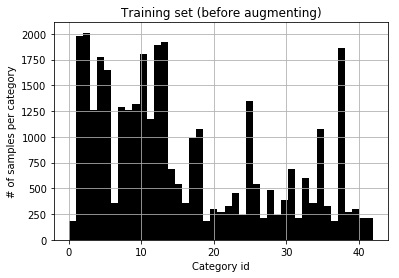

In [6]:
def plot_distribution(y_train, y_valid, y_test):

    train_cnt = []
    valid_cnt = []
    test_cnt = []
    for cat_id, desc in zip(category_ids, category_descs)   :
        cnt = np.where(y_train == cat_id)
        train_cnt.append(cnt[0].size)
        cnt = np.where(y_valid == cat_id)
        valid_cnt.append(cnt[0].size)
        cnt = np.where(y_test == cat_id)
        test_cnt.append(cnt[0].size)
        print("{0}({1}): {2}".format(cat_id, size, desc))
 
plt.hist(y_train , bins=n_classes, color=['black'])
plt.ylabel('# of samples per category')
plt.xlabel('Category id')
plt.title('Training set (before augmenting)')
plt.grid(True)
plt.show()

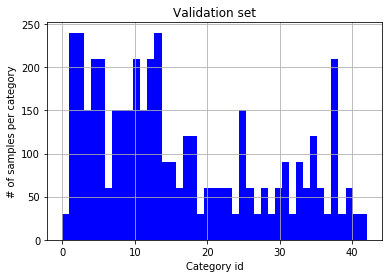

In [7]:
plt.hist(y_valid , bins=n_classes, color=['blue'])
plt.ylabel('# of samples per category')
plt.xlabel('Category id')
plt.title('Validation set')
plt.grid(True)
plt.show()

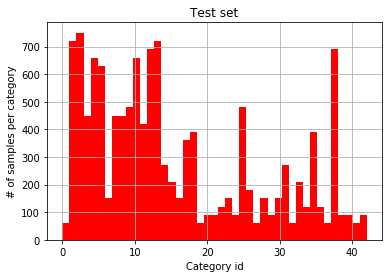

In [8]:
plt.hist(y_test , bins=n_classes, color=['red'])
plt.ylabel('# of samples per category')
plt.xlabel('Category id')
plt.title('Test set')
plt.grid(True)
plt.show()

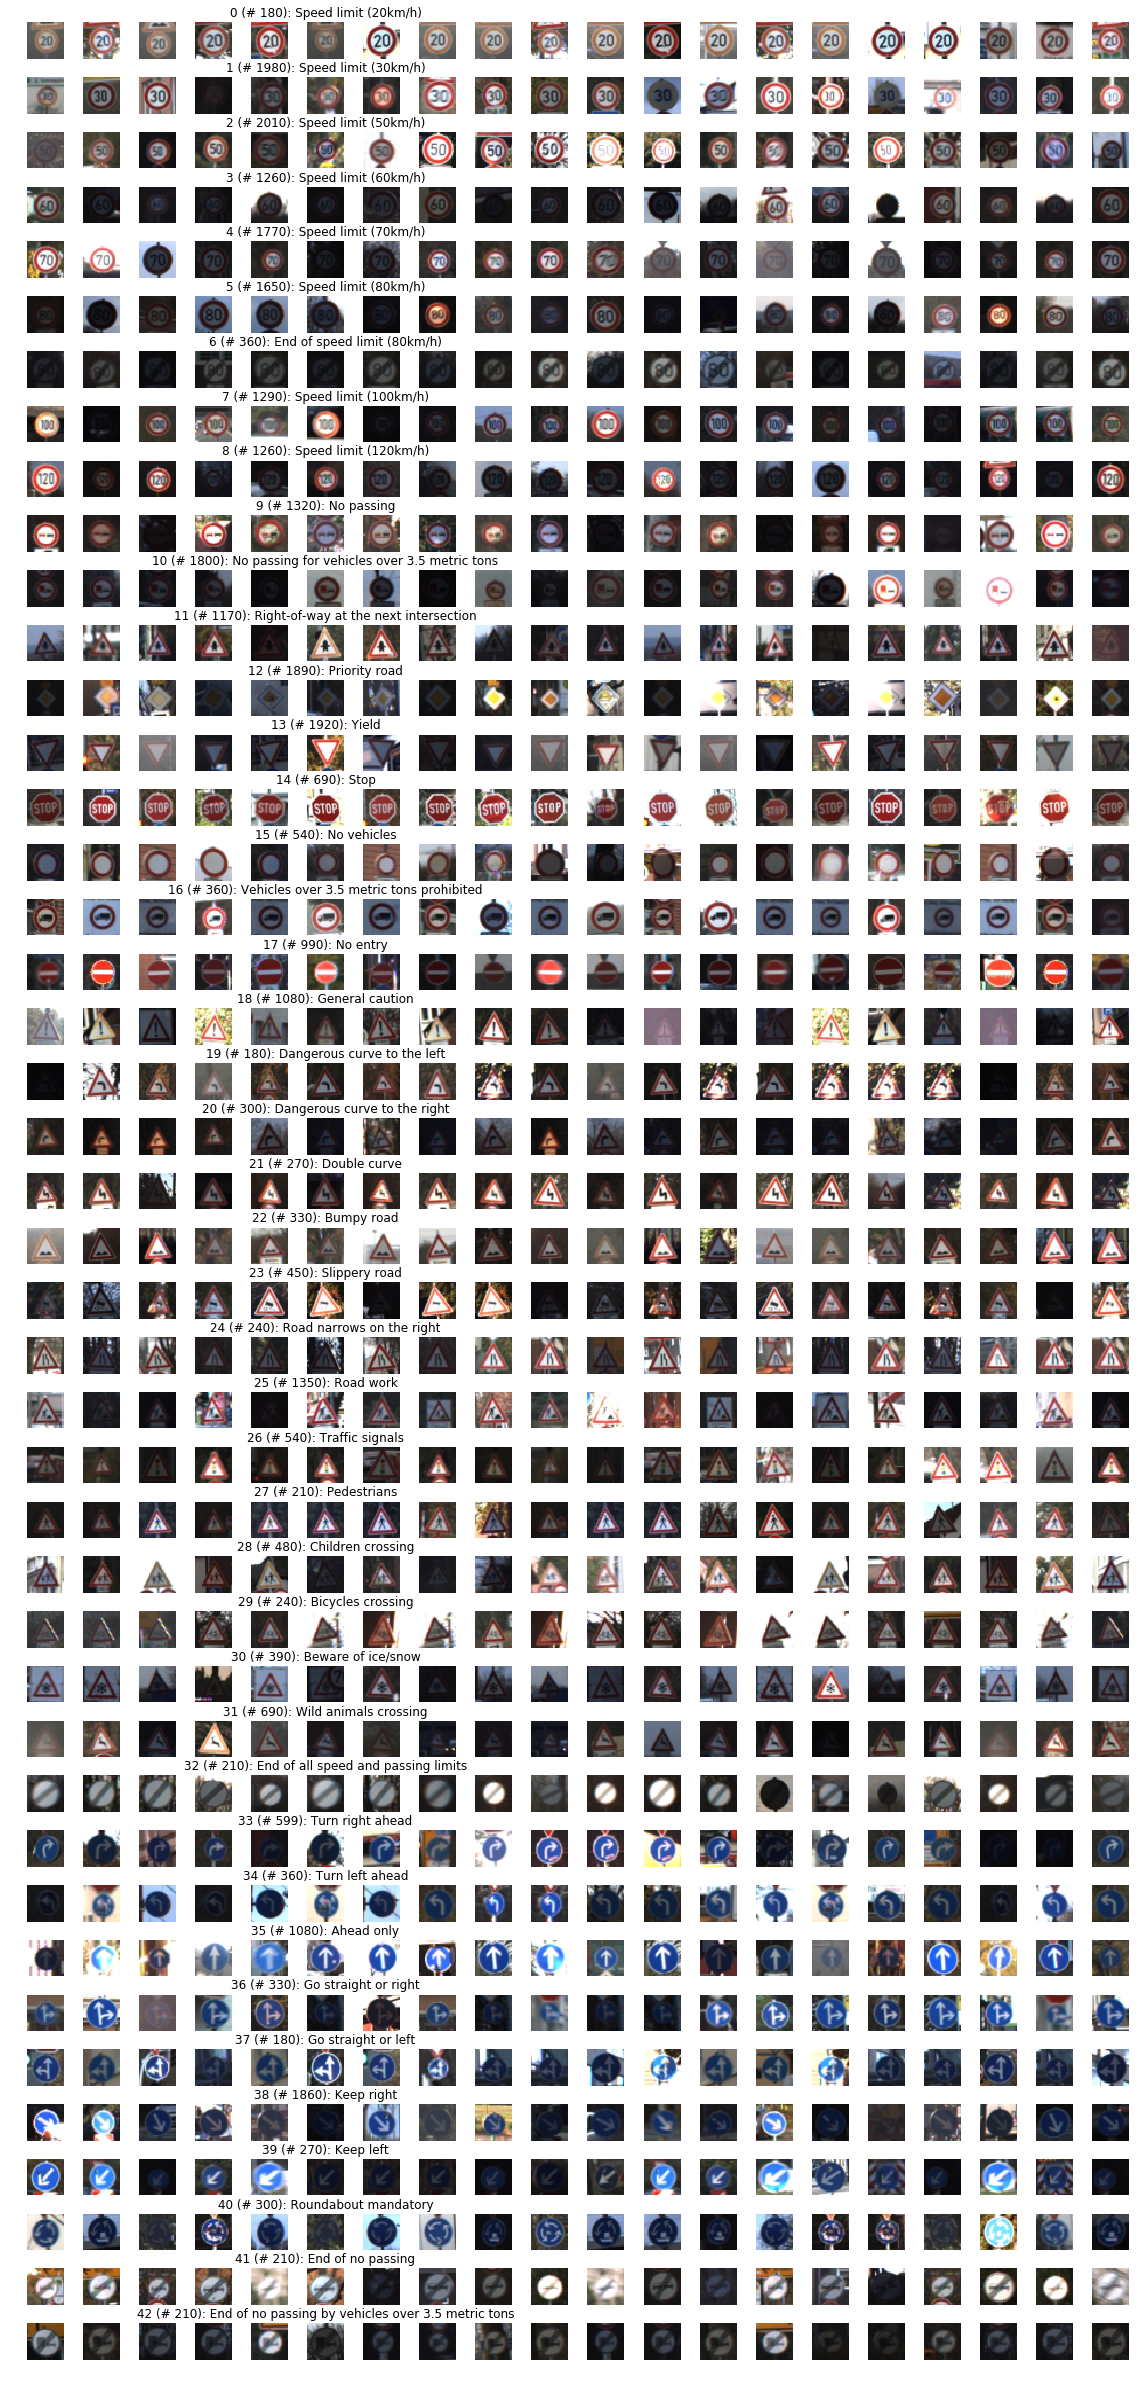

2010


In [9]:
from random import randrange

# Visualizations will be shown in the notebook.
%matplotlib inline

no_of_colums = 20
f, grid = plt.subplots(n_classes, no_of_colums, figsize=(no_of_colums, n_classes))
plt.subplots_adjust(hspace=0.5, wspace=0.1)

max_cat_cnt = 0
for cat_id in range(n_classes):
    images_in_cat = np.where(y_train == int(cat_id))
    size = images_in_cat[0].size
    if size > max_cat_cnt:
        max_cat_cnt = size

    for column in range(no_of_colums):
        # get random image from training set
        image = X_train[images_in_cat[0][randrange(size)]]
        image = np.true_divide(image, 255)

        # show image
        if column == 5:
            grid[cat_id, column].set_title("{0} (# {1}): {2}".format(cat_id, size, category_descs[cat_id]))
        grid[cat_id, column].imshow(image)
        grid[cat_id, column].axis('off')
plt.show()
print(max_cat_cnt)
#max_cat_cnt=1000

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

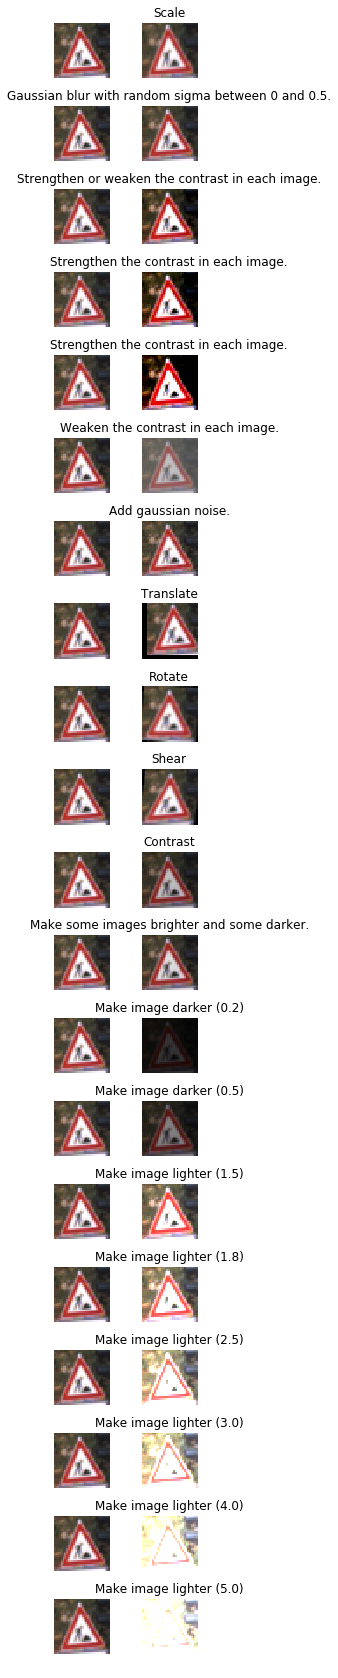

In [10]:
# show possible transformation

from math import ceil
import imgaug as ia
from imgaug import augmenters as iaa

transformations_desc = []
transformations = []

transformations_desc.append('Scale')
transformations.append(iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},))
                       
transformations_desc.append('Gaussian blur with random sigma between 0 and 0.5.')
transformations.append(iaa.GaussianBlur(sigma=(0, 0.5)))
                       
transformations_desc.append('Strengthen or weaken the contrast in each image.')
transformations.append(iaa.ContrastNormalization((0.75, 1.5)),)

transformations_desc.append('Strengthen the contrast in each image.')
transformations.append(iaa.ContrastNormalization((1.5, 1.5)),)

transformations_desc.append('Strengthen the contrast in each image.')
transformations.append(iaa.ContrastNormalization((2.0, 2.0)),)

transformations_desc.append('Weaken the contrast in each image.')
transformations.append(iaa.ContrastNormalization((0.5, 0.5)),)

transformations_desc.append('Add gaussian noise.')
transformations.append(iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),)
                       
transformations_desc.append('Translate')
transformations.append(iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},))

transformations_desc.append('Rotate')
transformations.append(iaa.Affine(rotate=(-15, 15),),)

transformations_desc.append('Shear')
transformations.append(iaa.Affine(shear=(-8, 8)),)

transformations_desc.append('Contrast')
transformations.append(iaa.Multiply((0.5, 1.5)),)

transformations_desc.append('Make some images brighter and some darker.')
transformations.append(iaa.Multiply((0.8, 1.2), per_channel=0.2),)

transformations_desc.append('Make image darker (0.2)')
transformations.append(iaa.Multiply((0.2, 0.2)),)

transformations_desc.append('Make image darker (0.5)')
transformations.append(iaa.Multiply((0.5, 0.5)),)

transformations_desc.append('Make image lighter (1.5)')
transformations.append(iaa.Multiply((1.5, 1.5)),)

transformations_desc.append('Make image lighter (1.8)')
transformations.append(iaa.Multiply((1.8, 1.8)),)

transformations_desc.append('Make image lighter (2.5)')
transformations.append(iaa.Multiply((2.5, 2.5)),)

transformations_desc.append('Make image lighter (3.0)')
transformations.append(iaa.Multiply((3.0, 3.0)),)

transformations_desc.append('Make image lighter (4.0)')
transformations.append(iaa.Multiply((4.0, 4.0)),)

transformations_desc.append('Make image lighter (5.0)')
transformations.append(iaa.Multiply((5.0, 5.0)),)

f, axarr = plt.subplots(len(transformations), 2, figsize=(3, 30))
plt.subplots_adjust(hspace=0.5, wspace=0.1)

index = randrange(n_train)

for trans_index in range(len(transformations)):

    # original one
    axarr[trans_index, 0].imshow(X_train[index])
    axarr[trans_index, 0].axis('off')
    
    # scale
    axarr[trans_index, 1].imshow(transformations[trans_index].augment_image(X_train[index]))
    axarr[trans_index, 1].set_title(transformations_desc[trans_index])
    axarr[trans_index, 1].axis('off')


In [11]:
#ia.seed(1)

# Balance the training set
augment_sequential = iaa.Sequential([
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    #iaa.Sometimes(0.5,
    #    iaa.GaussianBlur(sigma=(0, 0.5))
    #),
    # Strengthen or weaken the contrast in each image.
    #iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    #iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Sometimes(0.25,           
        iaa.Affine(
            scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
    )),
    iaa.Sometimes(0.25,           
        iaa.Affine(
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
    )),
    iaa.Sometimes(0.25,           
        iaa.Affine(
            rotate=(-15, 15),
    )),
    iaa.Sometimes(0.25,           
        iaa.Affine(
            shear=(-8, 8)
    )),
    iaa.Sometimes(0.25,        
        iaa.Multiply((0.5, 1.5)),
    ),
], random_order=True) # apply augmenters in random order

augment_oneoff = iaa.OneOf([
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    #iaa.Sometimes(0.5,
    #    iaa.GaussianBlur(sigma=(0, 0.5))
    #),
    # Strengthen or weaken the contrast in each image.
    #iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    #iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
        iaa.Affine(
            scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
    ),
        iaa.Affine(
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
    ),
        iaa.Affine(
            rotate=(-20, 20),
    ),
        iaa.Affine(
            shear=(-8, 8)
    ),
        iaa.Multiply((0.5, 5.0)), # in stead of 1.5
])

for cat_id in category_ids:
    index = np.where(y_train == cat_id)
    count_cat = index[0].size
    if count_cat >= max_cat_cnt:
        print('Cat id {}/{} skipped, more than max # of images: {}'.format(cat_id, category_descs[cat_id], count_cat))
        continue
    selection_x = X_train[np.where(y_train == cat_id)]
    selection_y = y_train[np.where(y_train == cat_id)]
    # multiply
    add_x = np.repeat(selection_x, ceil((max_cat_cnt - count_cat) / count_cat) , axis=0)
    add_y = np.repeat(selection_y, ceil((max_cat_cnt - count_cat) / count_cat) , axis=0)

    #augmented_x = seq_simple.augment_images(add_x)
    augmented_x = augment_oneoff.augment_images(add_x)

    X_train = np.concatenate((X_train, augmented_x[:(max_cat_cnt - count_cat), :, :, :]))
    y_train = np.concatenate((y_train, add_y[:(max_cat_cnt - count_cat)]))
    print("Cat {}/{} augmented from {} to {}".format(cat_id, category_descs[cat_id], count_cat, max_cat_cnt))
print('done')

Cat 0/Speed limit (20km/h) augmented from 180 to 2010
Cat 1/Speed limit (30km/h) augmented from 1980 to 2010
Cat id 2/Speed limit (50km/h) skipped, more than max # of images: 2010
Cat 3/Speed limit (60km/h) augmented from 1260 to 2010
Cat 4/Speed limit (70km/h) augmented from 1770 to 2010
Cat 5/Speed limit (80km/h) augmented from 1650 to 2010
Cat 6/End of speed limit (80km/h) augmented from 360 to 2010
Cat 7/Speed limit (100km/h) augmented from 1290 to 2010
Cat 8/Speed limit (120km/h) augmented from 1260 to 2010
Cat 9/No passing augmented from 1320 to 2010
Cat 10/No passing for vehicles over 3.5 metric tons augmented from 1800 to 2010
Cat 11/Right-of-way at the next intersection augmented from 1170 to 2010
Cat 12/Priority road augmented from 1890 to 2010
Cat 13/Yield augmented from 1920 to 2010
Cat 14/Stop augmented from 690 to 2010
Cat 15/No vehicles augmented from 540 to 2010
Cat 16/Vehicles over 3.5 metric tons prohibited augmented from 360 to 2010
Cat 17/No entry augmented from 990

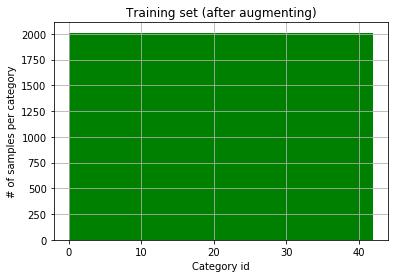

In [12]:
plt.hist(y_train , bins=43, color=['green'])
plt.ylabel('# of samples per category')
plt.xlabel('Category id')
plt.title('Training set (after augmenting)')
plt.grid(True)
plt.show()

In [13]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    #min_target = -1.0
    min_target = 0.0
    max_target = 1.0
    min = 0
    max = 255
    return min_target + ( ( (image_data - min)*(max_target - min_target) )/( max - min ) )

def rgb2gray(rgb):
    new_shape = (rgb.shape[0], rgb.shape[1], rgb.shape[2], 1)
    return np.reshape(np.dot(rgb[...,:4], [0.299, 0.587, 0.114]), new_shape)

In [14]:
# normalize to -1.0 - 1.0 rgb: is better than 0-1 and better than grayscale

X_train = normalize(X_train)
X_test = normalize(X_test)
X_valid = normalize(X_valid)

### Model Architecture

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x, p_dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.dropout(conv1, p_dropout) # result is worse when enabled
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2, p_dropout) # result is worse when enabled
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, p_dropout)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, p_dropout)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
# Setup tensorflow

In [17]:
tf.reset_default_graph()

In [18]:
EPOCHS = 100
BATCH_SIZE = 128

In [19]:
# Features and labels

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) # remove , 1
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

p_dropout = tf.placeholder(tf.float32, name='p_dropout')

In [21]:
# Training pipeline

In [22]:
rate = 0.001

logits = LeNet(x, p_dropout)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [23]:
# Evaluate

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, p_dropout: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train & validate the model

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import datetime

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    chart_training_accuracy = []
    chart_validation_accuracy = []
    chart_test_accuracy = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        start_time = datetime.datetime.now()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, p_dropout: 0.5})
        elapsed_time = datetime.datetime.now() - start_time
            
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        test_accuracy = evaluate(X_test, y_test)
        print("EPOCH {} in {} seconds ...".format(i+1, elapsed_time.seconds))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
        
        chart_training_accuracy.append(training_accuracy)
        chart_validation_accuracy.append(validation_accuracy)
        chart_test_accuracy.append(test_accuracy)
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 in 44 seconds ...
Training Accuracy = 0.761
Validation Accuracy = 0.734
Test Accuracy = 0.706

EPOCH 2 in 43 seconds ...
Training Accuracy = 0.871
Validation Accuracy = 0.841
Test Accuracy = 0.816

EPOCH 3 in 46 seconds ...
Training Accuracy = 0.906
Validation Accuracy = 0.889
Test Accuracy = 0.864

EPOCH 4 in 57 seconds ...
Training Accuracy = 0.923
Validation Accuracy = 0.902
Test Accuracy = 0.887

EPOCH 5 in 51 seconds ...
Training Accuracy = 0.935
Validation Accuracy = 0.917
Test Accuracy = 0.906

EPOCH 6 in 45 seconds ...
Training Accuracy = 0.942
Validation Accuracy = 0.922
Test Accuracy = 0.908

EPOCH 7 in 48 seconds ...
Training Accuracy = 0.951
Validation Accuracy = 0.932
Test Accuracy = 0.918

EPOCH 8 in 57 seconds ...
Training Accuracy = 0.949
Validation Accuracy = 0.921
Test Accuracy = 0.909

EPOCH 9 in 50 seconds ...
Training Accuracy = 0.958
Validation Accuracy = 0.937
Test Accuracy = 0.918

EPOCH 10 in 48 seconds ...
Training Accuracy = 0.962
Validat

EPOCH 80 in 41 seconds ...
Training Accuracy = 0.990
Validation Accuracy = 0.958
Test Accuracy = 0.948

EPOCH 81 in 41 seconds ...
Training Accuracy = 0.988
Validation Accuracy = 0.957
Test Accuracy = 0.948

EPOCH 82 in 41 seconds ...
Training Accuracy = 0.989
Validation Accuracy = 0.957
Test Accuracy = 0.951

EPOCH 83 in 41 seconds ...
Training Accuracy = 0.988
Validation Accuracy = 0.959
Test Accuracy = 0.946

EPOCH 84 in 41 seconds ...
Training Accuracy = 0.990
Validation Accuracy = 0.962
Test Accuracy = 0.952

EPOCH 85 in 41 seconds ...
Training Accuracy = 0.990
Validation Accuracy = 0.960
Test Accuracy = 0.951

EPOCH 86 in 49 seconds ...
Training Accuracy = 0.989
Validation Accuracy = 0.961
Test Accuracy = 0.951

EPOCH 87 in 45 seconds ...
Training Accuracy = 0.989
Validation Accuracy = 0.957
Test Accuracy = 0.947

EPOCH 88 in 43 seconds ...
Training Accuracy = 0.989
Validation Accuracy = 0.957
Test Accuracy = 0.948

EPOCH 89 in 43 seconds ...
Training Accuracy = 0.988
Validation 

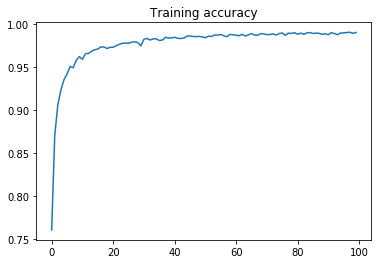

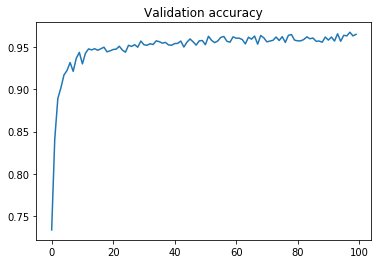

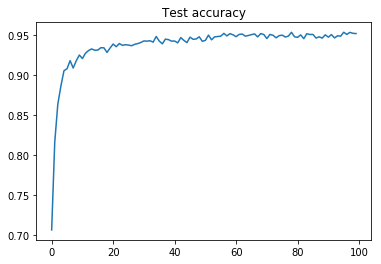

In [26]:
plt.plot(chart_training_accuracy)
plt.title("Training accuracy")
plt.show()

plt.plot(chart_validation_accuracy)
plt.title("Validation accuracy")
plt.show()

plt.plot(chart_test_accuracy)
plt.title("Test accuracy")
plt.show()

In [27]:
## Validate

In [28]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.952


In [29]:
## Training history

# 0.866 error rate met 10 epocs without normalisation (training rate=0.001, epoch=10, batch size=128, mu=0, sigma=0.1)
# 0.893 error rate met 50 epocs without normalisation (training rate=0.001, epoch=50, batch size=128, mu=0, sigma=0.1)
# 0.85 error rate met 10 epocs with normalisation 0.1,0.9 (training rate=0.001, epoch=10, batch size=128, mu=0, sigma=0.1)
# 0.904 error rate met 10 epocs with normalisation -1.0,1.0 (training rate=0.001, epoch=10, batch size=128, mu=0, sigma=0.1)
# 0.921 error rate met 50 epocs with normalisation -1.0,1.0 (training rate=0.001, epoch=10, batch size=128, mu=0, sigma=0.1)
# 0.903 error rate met 10 epocs with normalisation -0.5,0.5 (training rate=0.001, epoch=10, batch size=128, mu=0, sigma=0.1)
#
# to grayscale
# 0.859 error rate met 10 epocs with normalisation, grayscale 0.1,0.9 (training rate=0.001, epoch=10, batch size=128, mu=0, sigma=0.1)
# 0.899 error rate met 10 epocs with normalisation, grayscale -1.0,1.0 (training rate=0.001, epoch=10, batch size=128, mu=0, sigma=0.1)
#
# balance training set
# 0.878 error rate met 10 epocs with no changed to updated images, norm: -1.0,1.0 (training rate=0.001, epoch=10, batch size=128, mu=0, sigma=0.1)
# 0.889 error rate met 10 epocs with blur, contrast, noise, brightness to updated images, norm: -1.0,1.0 (training rate=0.001, epoch=10, batch size=128, mu=0, sigma=0.1)
# 0.885 error rate with 50 epocs
#
# redo with normalisation
# epoch 10: 0.913 and test: 0.897
#
# dropout: 0.9, augment with blur, contrast, noise, brightness to updated images
# epoch 50: 0.912  and test: 0.902
#
# dropout: 0.9 augment with blur, contrast, noise, brightness to updated images
#iaa.Affine(
#        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
#        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
#        rotate=(-15, 15),
#        shear=(-8, 8)
# epoch 10: training 0.985 and validate: 0.909 and test: 0.915
# epoch 50: training 0.999 and validate: 0.937 and test: 0.932
#
# same augmenting but dropout=0.5
# epoch 10: training 0.952 and validate: 0.944 and test: 0.917
# epoch 50: training 0.983 and validate: 0.956 and test: 0.937
#
# same max 1000 per cat with augmenting, dropout=0.5
# epoch 10: training 0.957 and validate: 0.929 and test: 0.913
# epoch 50: training 0.994 and validate: 0.965 and test: 0.940
#
# augm., dropout 0.5
# iaa.Affine(
#        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
#        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
#        rotate=(-25, 25),
#        shear=(-8, 8)
# EPOCH 10 in 26 seconds ...Training Accuracy = 0.857 Validation Accuracy = 0.909 Test Accuracy = 0.904
# EPOCH 50 in 25 seconds ...Training Accuracy = 0.953 Validation Accuracy = 0.936 Test Accuracy = 0.925
#
# aug. with to max 500, dropout 0.5
#iaa.Affine(
#        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
#        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
#        rotate=(-15, 15),
#        shear=(-8, 8)
# EPOCH 10 in 19 seconds ... Training Accuracy = 0.965 - Validation Accuracy = 0.928 Test Accuracy = 0.926
# EPOCH 50 in 20 seconds ... Training Accuracy = 0.995 Validation Accuracy = 0.958 Test Accuracy = 0.949
#
# same as before but each with prob of 0.25 each
# EPOCH 10 in 17 seconds ... Training Accuracy = 0.899 Validation Accuracy = 0.929 Test Accuracy = 0.917
# EPOCH 50 in 18 seconds ... Training Accuracy = 0.919 Validation Accuracy = 0.958 Test Accuracy = 0.944
#
# iaa.Sometimes(0.25,           
#        iaa.Affine(
#            scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
#    )),
#    iaa.Sometimes(0.25,           
#        iaa.Affine(
#            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
#    )),
#    iaa.Sometimes(0.25,           
#        iaa.Affine(
#            rotate=(-15, 15),
#    )),
#    iaa.Sometimes(0.25,           
#        iaa.Affine(
#            shear=(-8, 8)
#    )),
#    iaa.Multiply((0.5, 1.5), per_channel=0.2),
# EPOCH 10 in 18 seconds ... Training Accuracy = 0.887 Validation Accuracy = 0.928 Test Accuracy = 0.916
# EPOCH 50 in 19 seconds ... Training Accuracy = 0.908 Validation Accuracy = 0.958 Test Accuracy = 0.944
#
# iaa.Sometimes(0.25,           
#         iaa.Affine(
#             scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
#     )),
#     iaa.Sometimes(0.25,           
#         iaa.Affine(
#             translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
#     )),
#     iaa.Sometimes(0.25,           
#         iaa.Affine(
#             rotate=(-15, 15),
#     )),
#     iaa.Sometimes(0.25,           
#         iaa.Affine(
#             shear=(-8, 8)
#     )),
#     iaa.Sometimes(0.25,        
#         iaa.Multiply((0.5, 1.5)),
#     ),
# EPOCH 10 in 19 seconds ... Training Accuracy = 0.891 Validation Accuracy = 0.931 Test Accuracy = 0.915
# EPOCH 50 in 18 seconds ... Training Accuracy = 0.914 Validation Accuracy = 0.963 Test Accuracy = 0.949
# EPOCH 100 in 18 seconds ...Training Accuracy = 0.919 Validation Accuracy = 0.966 Test Accuracy = 0.951
#
# also dropout after convolution layer -> result worse
# EPOCH 10 in 24 seconds ... Training Accuracy = 0.847 Validation Accuracy = 0.895 Test Accuracy = 0.883
# EPOCH 50 in 22 seconds ... Training Accuracy = 0.893 Validation Accuracy = 0.946 Test Accuracy = 0.935
#
# augment oneoff in stead of sequential random
# EPOCH 10 in 18 seconds ... Training Accuracy = 0.969 Validation Accuracy = 0.939 Test Accuracy = 0.914
# EPOCH 50 in 18 seconds ... Training Accuracy = 0.997 Validation Accuracy = 0.951 Test Accuracy = 0.939
#
# augment lighter
# EPOCH 10 in 18 seconds ... Training Accuracy = 0.971 Validation Accuracy = 0.933 Test Accuracy = 0.917
# EPOCH 50 in 19 seconds ... Training Accuracy = 0.997 Validation Accuracy = 0.961 Test Accuracy = 0.943
#
# augment increase sampels to 1000 per category
# EPOCH 10 in 47 seconds ... Training Accuracy = 0.972 Validation Accuracy = 0.961 Test Accuracy = 0.938 
# EPOCH 50 in 46 seconds ... Training Accuracy = 0.990 Validation Accuracy = 0.964 Test Accuracy = 0.954
# EPOCH 100 in 43 seconds ... Training Accuracy = 0.995 Validation Accuracy = 0.970 Test Accuracy = 0.958
#
# increase rotation from 15 to 20

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3) uint8


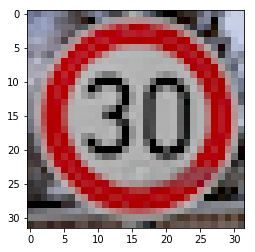

(32, 32, 3) uint8


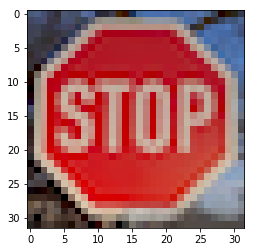

(32, 32, 3) uint8


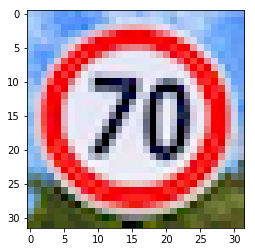

(32, 32, 3) uint8


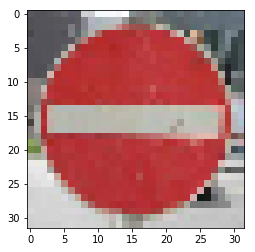

(32, 32, 3) uint8


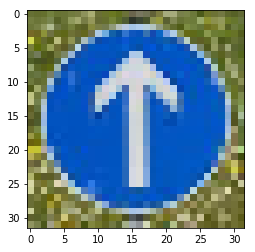

(32, 32, 3) uint8


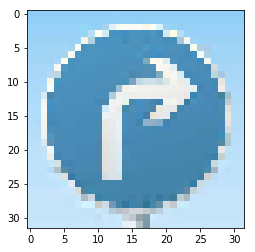

(32, 32, 3) uint8


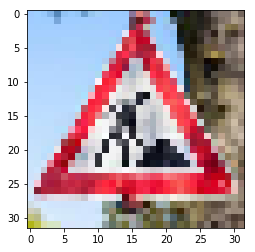

(32, 32, 3) uint8


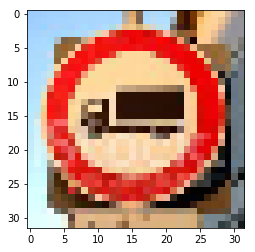

(32, 32, 3) uint8


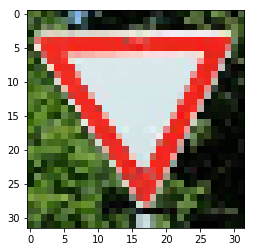

(32, 32, 3) uint8


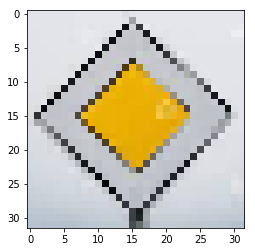

(32, 32, 3) uint8


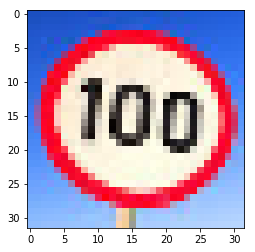

In [30]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import imageio
import cv2

signs = []
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/30kmh.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/stop.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/70kmh.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/oneway-noentry.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/oneway-go.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/rightturn.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/workinprogress.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/trucks-forbidden.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/majorroad-ahead.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/majorroad.png'), (32, 32)))
signs.append(cv2.resize(imageio.imread('./data/03-trafficsigns-from-internet/100kmh.png'), (32, 32)))

for sign in signs:
    print(sign.shape, sign.dtype)
    plt.imshow(sign)
    plt.show()

### Predict the Sign Type for Each Image

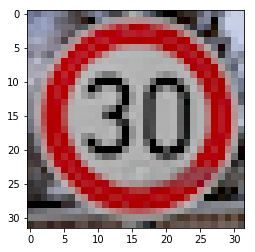

Speed limit (30km/h)


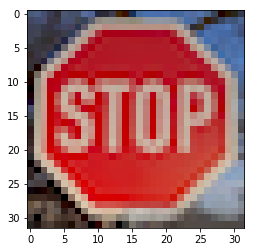

Stop


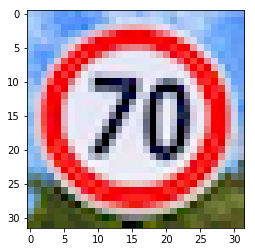

Speed limit (30km/h)


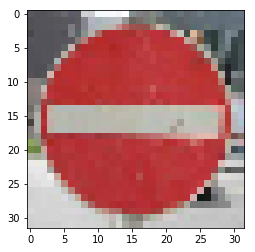

No entry


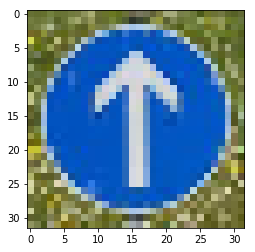

Ahead only


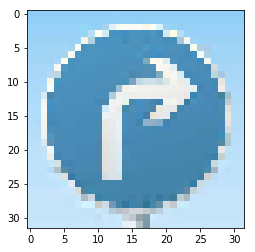

Turn right ahead


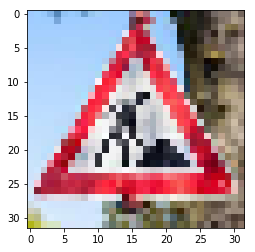

Road work


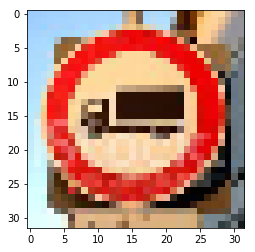

Vehicles over 3.5 metric tons prohibited


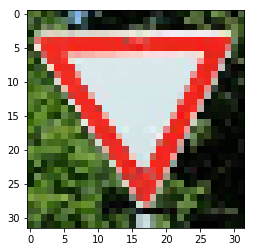

Yield


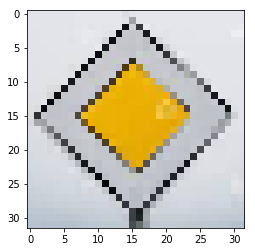

Priority road


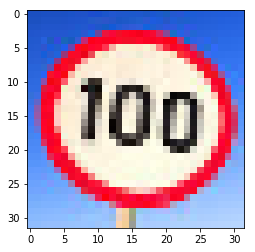

Speed limit (60km/h)


In [47]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def predict(image):
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph('./lenet.meta')
        saver.restore(sess, './lenet')
        prediction = tf.argmax(logits, 1)
        return prediction.eval(feed_dict={x: image[np.newaxis, :, :, :], p_dropout: 1.0})       
      
for sign in signs:
    #sign = normalize(sign).astype('float32')
    #print(sign.shape, sign.dtype)

    plt.imshow(sign)
    plt.show()    

    print(category_descs[predict(sign)[0]])


### Analyze Performance

In [32]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [33]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

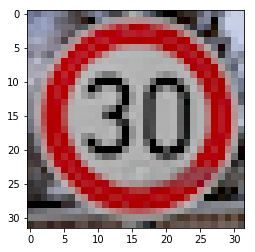

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Speed limit (30km/h) with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000
Speed limit (70km/h) with prob 0.000


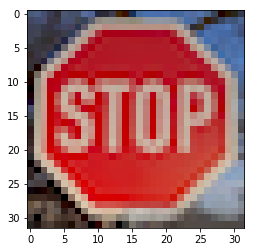

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Stop with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (30km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000


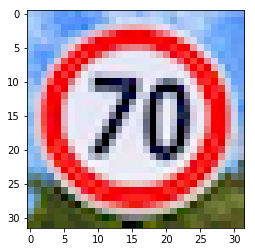

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Speed limit (30km/h) with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000
Speed limit (70km/h) with prob 0.000


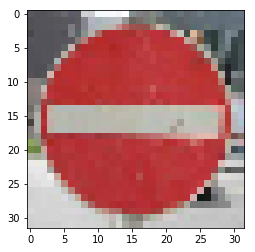

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
No entry with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (30km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000


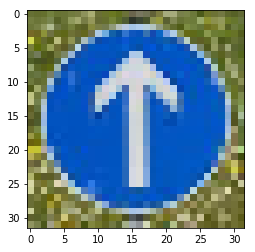

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Ahead only with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (30km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000


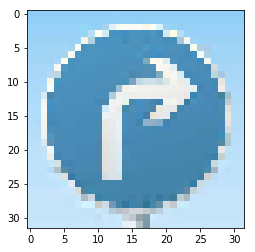

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Turn right ahead with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (30km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000


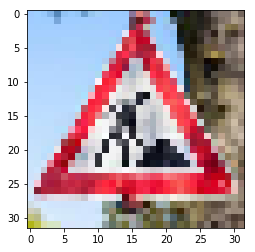

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Road work with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (30km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000


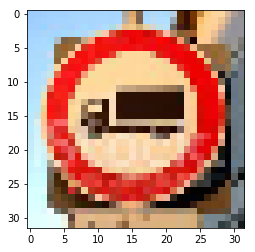

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Vehicles over 3.5 metric tons prohibited with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (30km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000


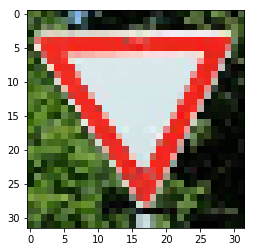

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Yield with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (30km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000


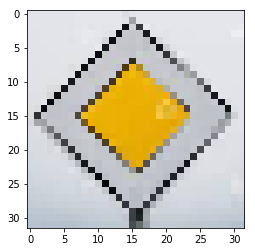

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Priority road with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (30km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (60km/h) with prob 0.000


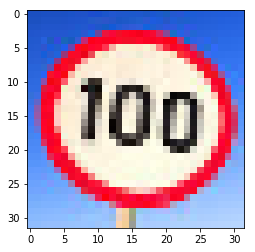

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Speed limit (60km/h) with prob 1.000
Speed limit (20km/h) with prob 0.000
Speed limit (30km/h) with prob 0.000
Speed limit (50km/h) with prob 0.000
Speed limit (70km/h) with prob 0.000


In [36]:
def get_top_softmax(image, k):
    with tf.Session() as sess:
        #saver = tf.train.import_meta_graph('./lenet.meta')
        #saver.restore(sess, './lenet')
        
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        #softmax = sess.run(tf.nn.softmax(logits), feed_dict={x:image[np.newaxis,:,:,:], p_dropout: 1.0})
        #return sess.run(tf.nn.top_k(softmax, k))
    
        softmax = sess.run(tf.nn.softmax(logits), feed_dict={x:image[np.newaxis,:,:,:], p_dropout: 1.})
        return sess.run(tf.nn.top_k(softmax, k))

for sign in signs:
    plt.imshow(sign)
    plt.show()    
    values, indices = get_top_softmax(sign, 5)
    for value, index in zip(values[0], indices[0]):
        print("{0} with prob {1:.3f}".format(category_descs[index], value))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")